In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('ecommerce_customer_data_large.csv')

In [3]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [4]:
df.columns

Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price',
       'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age',
       'Returns', 'Customer Name', 'Age', 'Gender', 'Churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [6]:
df.shape

(250000, 13)

In [7]:
df.isna().sum()

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

In [8]:
df.describe()

,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Churn
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,202618.000000,250000.000000,250000.00000
mean,25017.632092,254.742724,3.004936,2725.385196,43.798276,0.500824,43.798276,0.20052
std,14412.515718,141.738104,1.414737,1442.576095,15.364915,0.500001,15.364915,0.40039
min,1.000000,10.000000,1.000000,100.000000,18.000000,0.000000,18.000000,0.00000
25%,12590.000000,132.000000,2.000000,1476.000000,30.000000,0.000000,30.000000,0.00000
50%,25011.000000,255.000000,3.000000,2725.000000,44.000000,1.000000,44.000000,0.00000
75%,37441.250000,377.000000,4.000000,3975.000000,57.000000,1.000000,57.000000,0.00000
max,50000.000000,500.000000,5.000000,5350.000000,70.000000,1.000000,70.000000,1.00000


In [9]:
df.duplicated().sum()

0

In [10]:
df[df.duplicated()].head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn


In [11]:
df['Returns']=df[['Returns']].fillna(df['Returns'].mean())

In [12]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

In [13]:
df.head(10)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.000000,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.000000,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.000000,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.000000,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.000000,John Rivera,31,Female,0
5,13738,2022-08-25 06:48:33,Home,191,3,3722,Credit Card,27,1.000000,Lauren Johnson,27,Female,0
6,13738,2023-07-25 05:17:24,Electronics,205,1,2773,Credit Card,27,0.500824,Lauren Johnson,27,Female,0
7,13738,2023-02-05 19:31:48,Books,370,5,1486,Cash,27,1.000000,Lauren Johnson,27,Female,0
8,13738,2021-12-21 03:29:05,Home,12,2,2175,Cash,27,0.500824,Lauren Johnson,27,Female,0
9,13738,2023-02-09 00:53:14,Electronics,40,4,4327,Cash,27,0.000000,Lauren Johnson,27,Female,0


In [14]:
##Line plot_product category vs total purchase amount

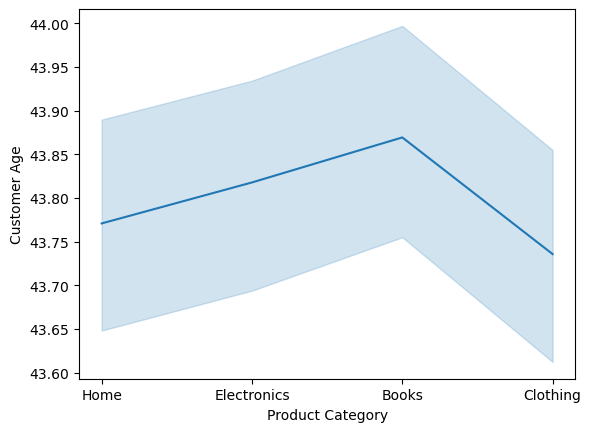

In [18]:
sns.lineplot(data=df, x='Product Category', y='Customer Age')
plt.show()

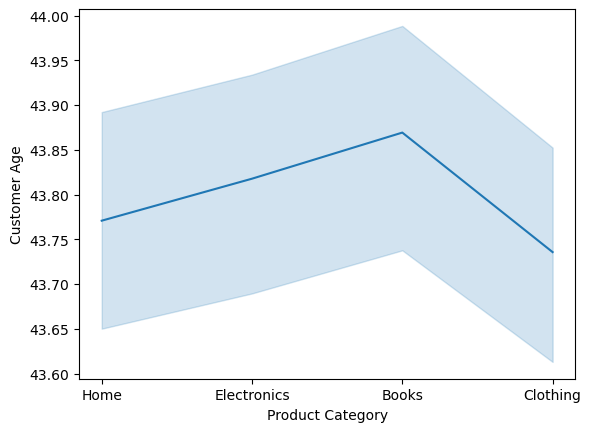

In [91]:
sns.lineplot(data=df, x='Product Category', y='Customer Age')
plt.show()

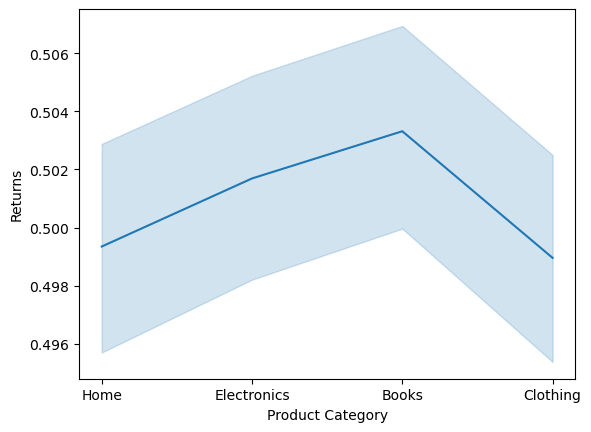

In [90]:
sns.lineplot(data=df, x='Product Category', y='Returns')
plt.show()

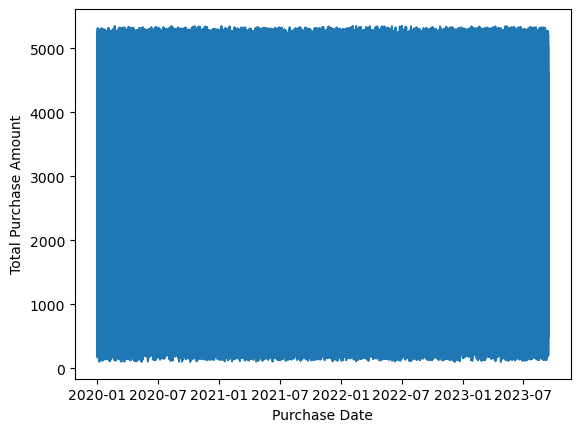

In [93]:
sns.lineplot(data=df, x='Purchase Date', y='Total Purchase Amount')
plt.show()

In [ ]:
##Histplot-Distribution of Total Purchase Amount

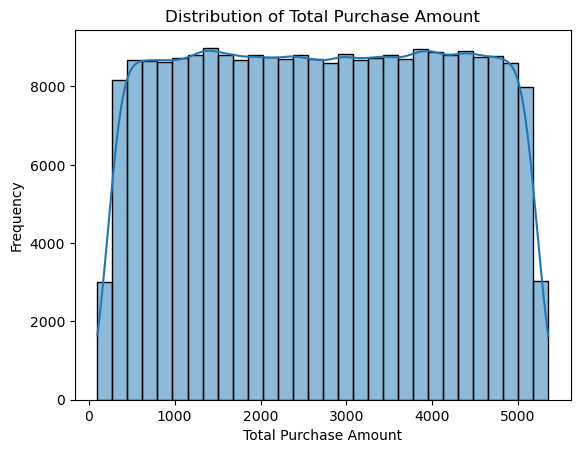

In [95]:
sns.histplot(df['Total Purchase Amount'], bins=30, kde=True)
plt.title('Distribution of Total Purchase Amount')
plt.xlabel('Total Purchase Amount')
plt.ylabel('Frequency')
plt.show()


In [ ]:
## Boxplot - Total Purchase Amount by Product Category

C:\Users\User\AppData\Local\Temp\ipykernel_14452\463279141.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Product Category', y='Total Purchase Amount', palette='Set2')


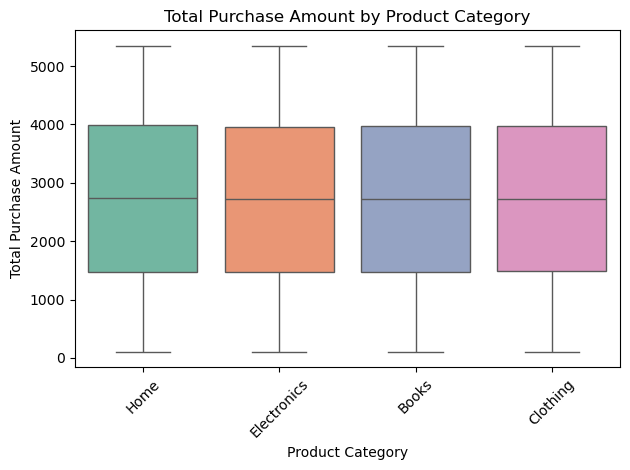

In [82]:
sns.boxplot(data=df, x='Product Category', y='Total Purchase Amount', palette='Set2')
plt.title('Total Purchase Amount by Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
##Countplot - Payment Method Distribution

C:\Users\User\AppData\Local\Temp\ipykernel_14452\2006689436.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Payment Method', palette='pastel')


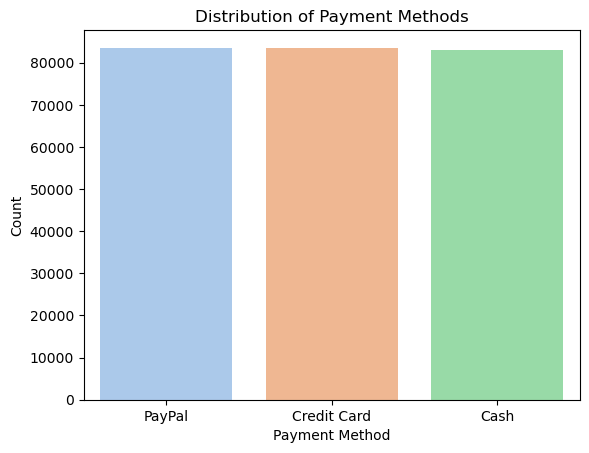

In [84]:
sns.countplot(data=df, x='Payment Method', palette='pastel')
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

In [ ]:
##Scatterplot-Age vs Total Purchase Amount

C:\Users\User\AppData\Local\Temp\ipykernel_14452\4277308416.py:3: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


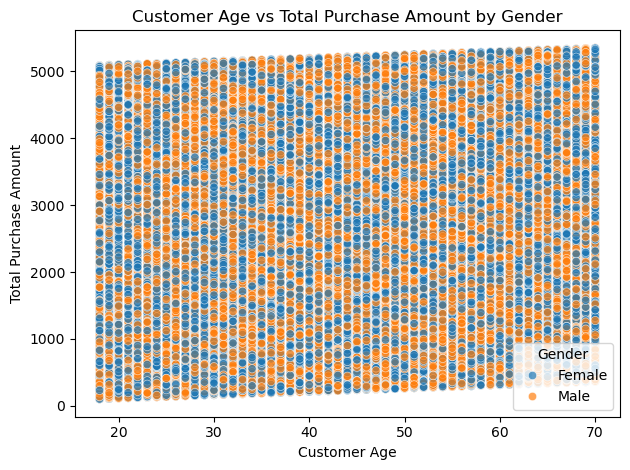

In [86]:
sns.scatterplot(data=df, x='Customer Age', y='Total Purchase Amount', hue='Gender', alpha=0.7)
plt.title('Customer Age vs Total Purchase Amount by Gender')
plt.tight_layout()
plt.show()

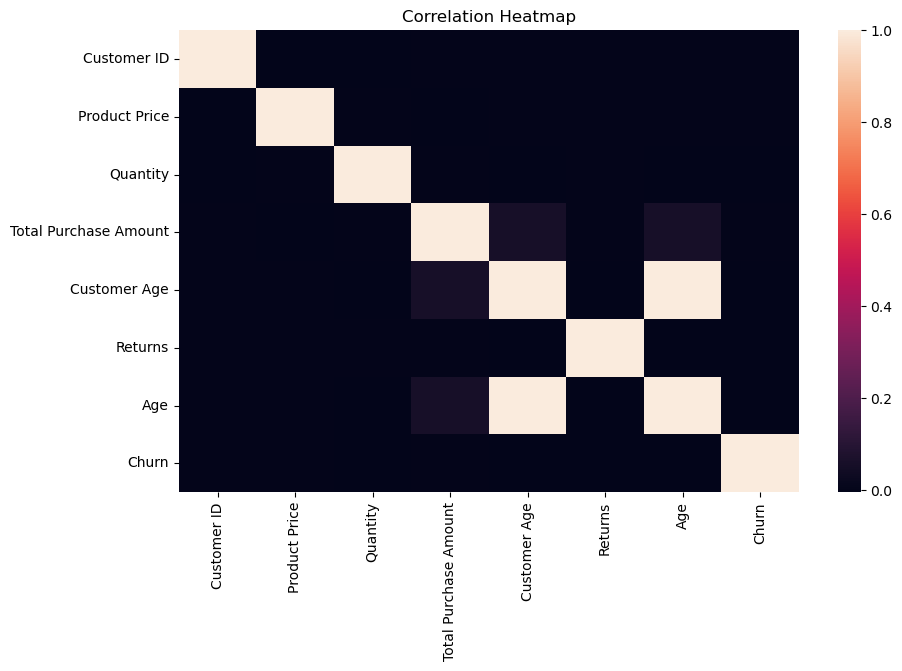

In [73]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include='number').corr())
plt.title("Correlation Heatmap")
plt.show()

In [96]:
##IQR method for outlier detection

In [15]:
Q1 = df['Total Purchase Amount'].quantile(0.25)
Q3 = df['Total Purchase Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Total Purchase Amount'] >= lower_bound) & (df['Total Purchase Amount'] <= upper_bound)]
print(f"Number of outliers detected: {len(outliers)}")
print(outliers[['Total Purchase Amount']])

Number of outliers detected: 250000
        Total Purchase Amount
0                        2427
1                        2448
2                        2345
3                         937
4                        2598
...                       ...
249995                   3664
249996                   4374
249997                   5296
249998                   2517
249999                   3634

[250000 rows x 1 columns]


In [16]:
##Z-score method for outlier detection

In [17]:
df['Z-score']=(df['Total Purchase Amount']-df['Total Purchase Amount'].mean()/df['Total Purchase Amount'])
z_outliers=df[(df['Z-score']>3)|(df['Z-score']<-3)]
print(f"Number of outliers detected: {len(z_outliers)}")
print(z_outliers[['Total Purchase Amount','Z-score']])

Number of outliers detected: 250000
        Total Purchase Amount      Z-score
0                        2427  2425.877056
1                        2448  2446.886689
2                        2345  2343.837789
3                         937   934.091371
4                        2598  2596.950968
...                       ...          ...
249995                   3664  3663.256172
249996                   4374  4373.376912
249997                   5296  5295.485388
249998                   2517  2515.917209
249999                   3634  3633.250032

[250000 rows x 2 columns]


In [18]:
##second part

In [19]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn,Z-score
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0,2425.877056
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0,2446.886689
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0,2343.837789
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0,934.091371
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0,2596.950968


In [20]:
df=df.drop(columns=['Z-score'])

In [21]:
df.head(4)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0


In [22]:
df.dtypes

Customer ID                       int64
Purchase Date            datetime64[ns]
Product Category                 object
Product Price                     int64
Quantity                          int64
Total Purchase Amount             int64
Payment Method                   object
Customer Age                      int64
Returns                         float64
Customer Name                    object
Age                               int64
Gender                           object
Churn                             int64
dtype: object

In [23]:
df.head(3)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0


In [24]:
df.columns

Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price',
       'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age',
       'Returns', 'Customer Name', 'Age', 'Gender', 'Churn'],
      dtype='object')

In [25]:
df=df.drop(columns=['Customer Name', 'Purchase Date'])

In [26]:
df['Return_Flag'] = df['Returns'].apply(lambda x: 1 if x > 0 else 0)

In [27]:
label_enc = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = label_enc.fit_transform(df[col])

In [28]:
df.head()

,Customer ID,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Age,Gender,Churn,Return_Flag
0,44605,3,177,1,2427,2,31,1.0,31,0,0,1
1,44605,2,174,3,2448,2,31,1.0,31,0,0,1
2,44605,0,413,1,2345,1,31,1.0,31,0,0,1
3,44605,2,396,3,937,0,31,0.0,31,0,0,0
4,44605,0,259,4,2598,2,31,1.0,31,0,0,1


In [29]:
df.dtypes

Customer ID                int64
Product Category           int32
Product Price              int64
Quantity                   int64
Total Purchase Amount      int64
Payment Method             int32
Customer Age               int64
Returns                  float64
Age                        int64
Gender                     int32
Churn                      int64
Return_Flag                int64
dtype: object

In [30]:
## Regressions

In [31]:
##Linear Regression

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [33]:
df.columns

Index(['Customer ID', 'Product Category', 'Product Price', 'Quantity',
       'Total Purchase Amount', 'Payment Method', 'Customer Age', 'Returns',
       'Age', 'Gender', 'Churn', 'Return_Flag'],
      dtype='object')

In [34]:
x= df.drop(columns=['Total Purchase Amount']) 
y = df['Total Purchase Amount']  # Target

In [35]:
x.head()

,Customer ID,Product Category,Product Price,Quantity,Payment Method,Customer Age,Returns,Age,Gender,Churn,Return_Flag
0,44605,3,177,1,2,31,1.0,31,0,0,1
1,44605,2,174,3,2,31,1.0,31,0,0,1
2,44605,0,413,1,1,31,1.0,31,0,0,1
3,44605,2,396,3,0,31,0.0,31,0,0,0
4,44605,0,259,4,2,31,1.0,31,0,0,1


In [36]:
y.head()

0    2427
1    2448
2    2345
3     937
4    2598
Name: Total Purchase Amount, dtype: int64

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [38]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [39]:
y_pred=model.predict(x_test)

In [40]:
model.predict([[44605,3,177,1,2,31,1.0,31,0,0,1]])

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2667.14397881])

In [41]:
y_pred=model.predict(x_test)
y_pred

array([2731.22475416, 2784.39216432, 2710.73881007, ..., 2726.93068391,
       2641.47192497, 2767.09915317])

In [42]:
y_test

38683     1237
64939     4807
3954       309
120374    1747
172861    2127
          ... 
179545     487
222647    3980
171823    5096
135782     488
208380    3910
Name: Total Purchase Amount, Length: 50000, dtype: int64

In [102]:
mae = mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred,squared=False)
r2=r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print('Mean absolute error',round(mae,2))
print('Mean squared error',round(mse,2))
print('Root Mean squared error',round(rmse,2))
print('R-squared Score:',r2*100)

Mean absolute error 1245.5
Mean squared error 1438.3
Root Mean squared error 37.92
R-squared Score: 0.29880857774354785


C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [44]:
##Random forest regression

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [47]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [48]:
##predictions
y_pred = rf_model.predict(x_test)


In [103]:
ran_mae = mean_absolute_error(y_test, y_pred)
ran_mse = mean_squared_error(y_test, y_pred,squared=False)
ran_r2 = r2_score(y_test, y_pred)
ran_rmse = np.sqrt(ran_mse)
print('Mean absolute error',round(ran_mae,2))
print('Mean squared error',round(ran_mse,2))
print('Root Mean squared error',round(ran_rmse,2))
print('R-squared Score:',ran_r2*100)


Mean absolute error 1245.5
Mean squared error 1438.3
Root Mean squared error 37.92
R-squared Score: 0.29880857774354785


C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [50]:
##Decision tree regressor

In [51]:
from sklearn.tree import DecisionTreeRegressor

In [52]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)


DecisionTreeRegressor(random_state=42)

In [104]:
# Predictions and evaluation
y_pred = dt_model.predict(x_test)
d_mae = mean_absolute_error(y_test,y_pred)
d_mse = mean_squared_error(y_test, y_pred)
d_rmse = np.sqrt(d_mse)
d_r2 = r2_score(y_test, y_pred)


In [105]:
print('Mean absalute error',round(d_mae,2))
print('Mean squared error',round(d_mse,2))
print('Root Mean squared error',round(d_rmse,2))
print('R-squared Score:',d_r2*100)

Mean absalute error 1676.99
Mean squared error 4220304.25
Root Mean squared error 2054.34
R-squared Score: -103.39716257702793


In [55]:
##KNN_Regressor

In [56]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [57]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [58]:
##Train KNN regressor

In [59]:
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can change k value here
knn_model.fit(x_train, y_train)


KNeighborsRegressor()

In [106]:
y_pred = knn_model.predict(x_test)
knn_mse = mean_squared_error(y_test, y_pred)
knn_mae = mean_absolute_error(y_test, y_pred)
knn_r2 = r2_score(y_test, y_pred)
knn_rmse = np.sqrt(knn_mse)
print(" KNN Regressor Results:")
print('Mean squared error',round(knn_mse,2))
print('Mean absalute error',round(knn_mae,2))
print('Root Mean squared error',round(knn_rmse,2))
print('R-squared Score:',knn_r2*100)

 KNN Regressor Results:
Mean squared error 2472743.54
Mean absalute error 1326.98
Root Mean squared error 1572.5
R-squared Score: -19.173640122553735


In [61]:
##SVR

In [62]:
from sklearn.svm import SVR

In [63]:
##Train support vector reegressor

In [64]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(x_train)
X_test_scaled = scaler_X.transform(x_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

In [65]:
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train_scaled)


SVR()

In [66]:
y_pred_scaled = svr_model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()


In [109]:
svr_mse = mean_squared_error(y_test, y_pred)
svr_mae = mean_absolute_error(y_test, y_pred)
svr_r2 = r2_score(y_test, y_pred)
svr_rmse=np.sqrt(svr_mse)
print('Mean squared error',round(svr_mse,2))
print('Mean absalute error',round(svr_mae,2))
print('Root Mean squared error',round(svr_rmse,2))
print('R-squared Score:',svr_r2*100)

Mean squared error 2472743.54
Mean absalute error 1326.98
Root Mean squared error 1572.5
R-squared Score: -19.173640122553735


In [71]:
##Ridge Regressor

In [72]:
from sklearn.linear_model import Ridge

In [73]:
# Train Ridge Regressor
ridge_model = Ridge(print('Root Mean squared error',round(ridge_rmse,2))) 
ridge_model.fit(X_train_scaled, y_train)


Ridge()

In [110]:
y_pred = ridge_model.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, y_pred)
ridge_mae = mean_absolute_error(y_test, y_pred)
ridge_r2 = r2_score(y_test, y_pred)
ridge_rmse=np.sqrt(ridge_mse)
print('Root Mean squared error',round(ridge_rmse,2))
print('Mean absolute error',round(ridge_mae,2))
print('Mean squared error',round(ridge_mse,2))
print('R-squared Score:',ridge_r2*100)

Root Mean squared error 1438.32
Mean absolute error 1245.5
Mean squared error 2068755.79
R-squared Score: 0.2965114056456275


In [75]:
##Lasso Regressor

In [76]:
from sklearn.linear_model import Lasso

In [79]:
# Train Lasso Regressor
lasso_model = Lasso() 
lasso_model.fit(X_train_scaled, y_train)


Lasso()

In [111]:
# Predictions and evaluation
y_pred = lasso_model.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, y_pred)
lasso_mae = mean_absolute_error(y_test, y_pred)
lasso_r2 = r2_score(y_test, y_pred)
lasso_rmse=np.sqrt(lasso_mse)
print('Root Mean squared error',round(lasso_rmse,2))
print('Mean absolute error',round(lasso_mae,2))
print('Mean squared error',round(lasso_mse,2))
print('R-squared Score:',lasso_r2*100)

Root Mean squared error 1438.3
Mean absolute error 1245.5
Mean squared error 2068708.12
R-squared Score: 0.29880857774354785


In [94]:
r2_scores = {
    "Linear Regression":r2,
    "Random Forest": ran_r2,
    "Decision Tree": d_r2,
    "KNN Regressor": knn_r2,
    "SVR": svr_r2,
    "Ridge Regression": ridge_r2,
    "Lasso Regression": lasso_r2
}

In [96]:
##Convert to DataFrame for better display
r2_df = pd.DataFrame(list(r2_scores.items()), columns=["Model", "R² Score"])
print(r2_df.sort_values(by="R² Score", ascending=False).to_string(index=False))

            Model  R² Score
Linear Regression  0.002988
    Random Forest  0.002988
 Lasso Regression  0.002988
 Ridge Regression  0.002965
    KNN Regressor -0.191736
              SVR -0.191736
    Decision Tree -1.033972


In [97]:
mse_scores = {
    "Linear Regression": mse,
    "Random Forest": ran_mse,
    "Decision Tree": d_mse,
    "KNN Regressor": knn_mse,
    "SVR": svr_mse,
    "Ridge Regression": ridge_mse,
    "Lasso Regression": lasso_mse
}

In [98]:
# Convert to DataFrame for display
mse_df = pd.DataFrame(list(mse_scores.items()), columns=["Model", "MSE"])
print(mse_df.sort_values(by="MSE").to_string(index=False))

            Model          MSE
Linear Regression 1.438300e+03
    Random Forest 1.438300e+03
 Lasso Regression 2.068708e+06
 Ridge Regression 2.068756e+06
    KNN Regressor 2.472744e+06
              SVR 2.472744e+06
    Decision Tree 4.220304e+06


In [112]:
rmse_scores = {
    "Linear Regression": rmse,
    "Random Forest": ran_rmse,
    "Decision Tree": d_rmse,
    "KNN Regressor": knn_rmse,
    "SVR": svr_rmse,
    "Ridge Regression": ridge_rmse,
    "Lasso Regression": lasso_rmse
}

In [113]:
# Convert to DataFrame for display
rmse_df = pd.DataFrame(list(rmse_scores.items()), columns=["Model", "RMSE"])
print(rmse_df.sort_values(by="RMSE").to_string(index=False))

            Model        RMSE
Linear Regression   37.924931
    Random Forest   37.924931
 Lasso Regression 1438.300428
 Ridge Regression 1438.316998
    KNN Regressor 1572.495959
              SVR 1572.495959
    Decision Tree 2054.337911


In [116]:
mae_scores = {
    "Linear Regression": mae,
    "Random Forest": ran_mae,
    "Decision Tree": d_mae,
    "KNN Regressor": knn_mae,
    "SVR": svr_mae,
    "Ridge Regression": ridge_mae,
    "Lasso Regression": lasso_mae
}

In [117]:
# Convert to DataFrame for display
mae_df = pd.DataFrame(list(mae_scores.items()), columns=["Model", "MAE"])
print(mae_df.sort_values(by="MAE").to_string(index=False))

            Model         MAE
Linear Regression 1245.499362
    Random Forest 1245.499362
 Lasso Regression 1245.499362
 Ridge Regression 1245.503714
    KNN Regressor 1326.981548
              SVR 1326.981548
    Decision Tree 1676.986810


In [118]:
## One Frame

In [121]:
metrics_df =r2_df.merge(mae_df,on="Model").merge(mse_df,on="Model").merge(rmse_df,on="Model")
print(metrics_df)

               Model  R² Score          MAE           MSE         RMSE
0  Linear Regression  0.002988  1245.499362  1.438300e+03    37.924931
1      Random Forest  0.002988  1245.499362  1.438300e+03    37.924931
2      Decision Tree -1.033972  1676.986810  4.220304e+06  2054.337911
3      KNN Regressor -0.191736  1326.981548  2.472744e+06  1572.495959
4                SVR -0.191736  1326.981548  2.472744e+06  1572.495959
5   Ridge Regression  0.002965  1245.503714  2.068756e+06  1438.316998
6   Lasso Regression  0.002988  1245.499362  2.068708e+06  1438.300428


In [122]:
# Set plot style

In [129]:
##R2 score
sns.set_style("whitegrid")  
plt.figure(figsize=(10,5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

C:\Users\User\AppData\Local\Temp\ipykernel_14168\1899230820.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R² Score', y='Model', data=r2_df, palette='viridis')


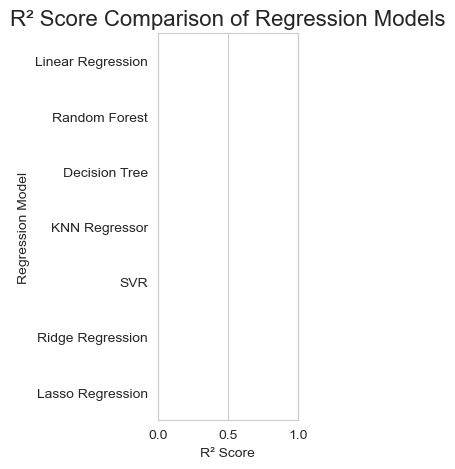

In [130]:
plt.subplot(1,3,1)
sns.barplot(x='R² Score', y='Model', data=r2_df, palette='viridis')
plt.title('R² Score Comparison of Regression Models', fontsize=16)
plt.xlabel('R² Score')
plt.ylabel('Regression Model')
plt.xlim(0, 1.0)
plt.tight_layout()
plt.show()

In [131]:
##RMSE

C:\Users\User\AppData\Local\Temp\ipykernel_14168\3667217917.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RMSE', y='Model', data=rmse_df, palette='viridis')


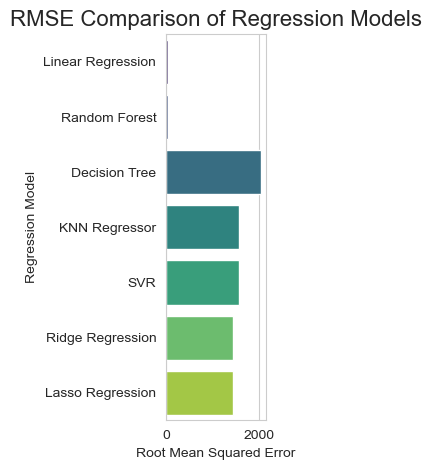

In [135]:
plt.subplot(1,3,2)
sns.barplot(x='RMSE', y='Model', data=rmse_df, palette='viridis')
plt.title('RMSE Comparison of Regression Models', fontsize=16)
plt.xlabel('Root Mean Squared Error')
plt.ylabel('Regression Model')
plt.tight_layout()
plt.show()

In [136]:
    #MAE

C:\Users\User\AppData\Local\Temp\ipykernel_14168\1229288877.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MAE', y='Model', data=mae_df, palette='light:#5A9')


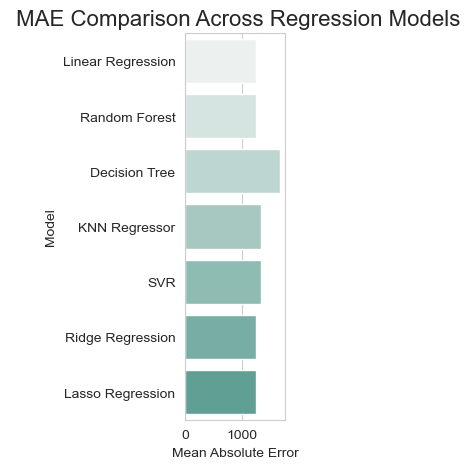

In [138]:
plt.subplot(1,3,3)
sns.barplot(x='MAE', y='Model', data=mae_df, palette='light:#5A9')
# Customize
plt.title(" MAE Comparison Across Regression Models", fontsize=16)
plt.xlabel("Mean Absolute Error")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

In [140]:
##Algorithams

In [141]:
##Classification Algorithams

In [143]:
##Create quantile-based bins
df['Purchase_Class'] = pd.qcut(df['Total Purchase Amount'], q=3, labels=['Low', 'Medium', 'High'])


In [144]:
# View value counts
print(df['Purchase_Class'].value_counts())

Purchase_Class
Low       83354
Medium    83345
High      83301
Name: count, dtype: int64


In [145]:
df.head()

,Customer ID,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Age,Gender,Churn,Return_Flag,Purchase_Class
0,44605,3,177,1,2427,2,31,1.0,31,0,0,1,Medium
1,44605,2,174,3,2448,2,31,1.0,31,0,0,1,Medium
2,44605,0,413,1,2345,1,31,1.0,31,0,0,1,Medium
3,44605,2,396,3,937,0,31,0.0,31,0,0,0,Low
4,44605,0,259,4,2598,2,31,1.0,31,0,0,1,Medium


In [146]:
df.columns

Index(['Customer ID', 'Product Category', 'Product Price', 'Quantity',
       'Total Purchase Amount', 'Payment Method', 'Customer Age', 'Returns',
       'Age', 'Gender', 'Churn', 'Return_Flag', 'Purchase_Class'],
      dtype='object')

In [147]:
x=df.drop(columns=['Customer ID','Purchase_Class'])

In [149]:
y=df['Purchase_Class']

In [151]:
x.head()

,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Age,Gender,Churn,Return_Flag
0,3,177,1,2427,2,31,1.0,31,0,0,1
1,2,174,3,2448,2,31,1.0,31,0,0,1
2,0,413,1,2345,1,31,1.0,31,0,0,1
3,2,396,3,937,0,31,0.0,31,0,0,0
4,0,259,4,2598,2,31,1.0,31,0,0,1


In [152]:
y.head()

0    Medium
1    Medium
2    Medium
3       Low
4    Medium
Name: Purchase_Class, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [154]:
#Split into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [155]:
# Create the scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [156]:
x_train

,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Age,Gender,Churn,Return_Flag
75381,2,450,4,4029,1,66,1.0,66,0,1,1
65569,3,445,2,4744,0,26,0.0,26,0,0,0
163473,3,11,4,2066,1,55,0.0,55,1,0,0
90518,0,256,5,2090,0,68,1.0,68,0,0,1
138866,1,221,1,491,0,51,0.0,51,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
119879,1,160,5,2215,0,42,0.0,42,0,0,0
103694,0,415,1,3096,0,42,0.0,42,1,1,0
131932,3,426,2,2792,0,59,1.0,59,0,0,1
146867,3,432,1,592,0,47,1.0,47,0,1,1


In [157]:
##Train the model

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [159]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)


LogisticRegression()

In [166]:
# Predict on test set
y_pred = log_reg.predict(X_test_scaled)
df=pd.DataFrame(y_test, y_pred)
df




,Purchase_Class
Low,NaN
High,NaN
Low,NaN
Low,NaN
Medium,NaN
...,...
Low,NaN
High,NaN
High,NaN
Low,NaN


In [170]:
##confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [172]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix \n",cm)

Confusion matrix 
 [[16553     0     4]
 [    0 16670     6]
 [   12    16 16739]]


In [230]:
# Evaluate the model
logreg_model=accuracy_score(y_test, y_pred)
print("Accuracy:",logreg_model )
print(" Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.99478
 Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00     16557
         Low       0.99      1.00      1.00     16676
      Medium       0.99      0.99      0.99     16767

    accuracy                           0.99     50000
   macro avg       0.99      0.99      0.99     50000
weighted avg       0.99      0.99      0.99     50000



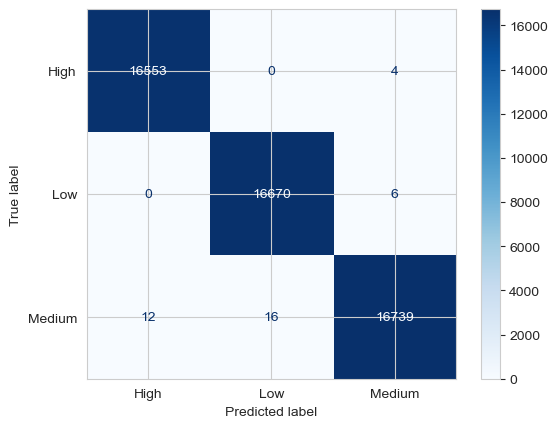

In [178]:
# Display it with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm,annot=True,fmt='d',cmap="Blues" ,display_labels=log_reg.classes_)
disp.plot(cmap='Blues')

In [180]:
##KNN classifier

In [181]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [182]:
## Initialize the model
knn = KNeighborsClassifier(n_neighbors=5)

# 2. Train the model
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [183]:
y_pred_knn = knn.predict(X_test_scaled)
df=pd.DataFrame(y_test,y_pred_knn)
df


,Purchase_Class
Low,NaN
High,NaN
Low,NaN
Medium,NaN
Medium,NaN
...,...
Low,NaN
Medium,NaN
High,NaN
Low,NaN


In [184]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion matrix \n",cm)


Confusion matrix 
 [[16553     0     4]
 [    0 16670     6]
 [   12    16 16739]]


In [231]:
# Evaluate the model
knn_model=accuracy_score(y_test,y_pred_knn)
print("Accuracy:",knn_model )
print(" Classification Report:\n", classification_report(y_test,y_pred_knn))

Accuracy: 0.9233
 Classification Report:
               precision    recall  f1-score   support

        High       0.94      0.95      0.94     16557
         Low       0.94      0.94      0.94     16676
      Medium       0.89      0.88      0.88     16767

    accuracy                           0.92     50000
   macro avg       0.92      0.92      0.92     50000
weighted avg       0.92      0.92      0.92     50000



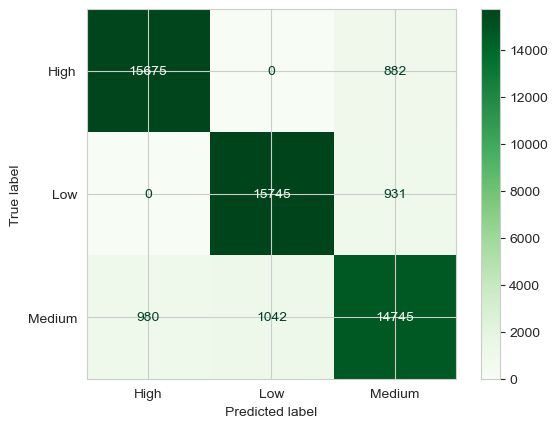

In [186]:
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn.classes_)
disp_knn.plot(cmap='Greens')

In [187]:
##Decision tree classifier

In [188]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [189]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [190]:
y_pred_dt = dt_clf.predict(X_test_scaled)
df=pd.DataFrame(y_test,y_pred_dt)
df

,Purchase_Class
Low,NaN
High,NaN
Low,NaN
Low,NaN
Medium,NaN
...,...
Low,NaN
High,NaN
High,NaN
Low,NaN


In [191]:
cm_dt = confusion_matrix(y_test,y_pred_dt)
print("Confusion matrix \n",cm)

Confusion matrix 
 [[16553     0     4]
 [    0 16670     6]
 [   12    16 16739]]


In [232]:
# Evaluate the model
dt_model= accuracy_score(y_test,y_pred_dt)
print("Accuracy:",dt_model)
print(" Classification Report:\n", classification_report(y_test,y_pred_dt))

Accuracy: 1.0
 Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00     16557
         Low       1.00      1.00      1.00     16676
      Medium       1.00      1.00      1.00     16767

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000



disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=dt_clf.classes_)
disp_dt.plot(cmap='Oranges')

In [194]:
##Tree ploting

In [195]:
from sklearn.tree import plot_tree

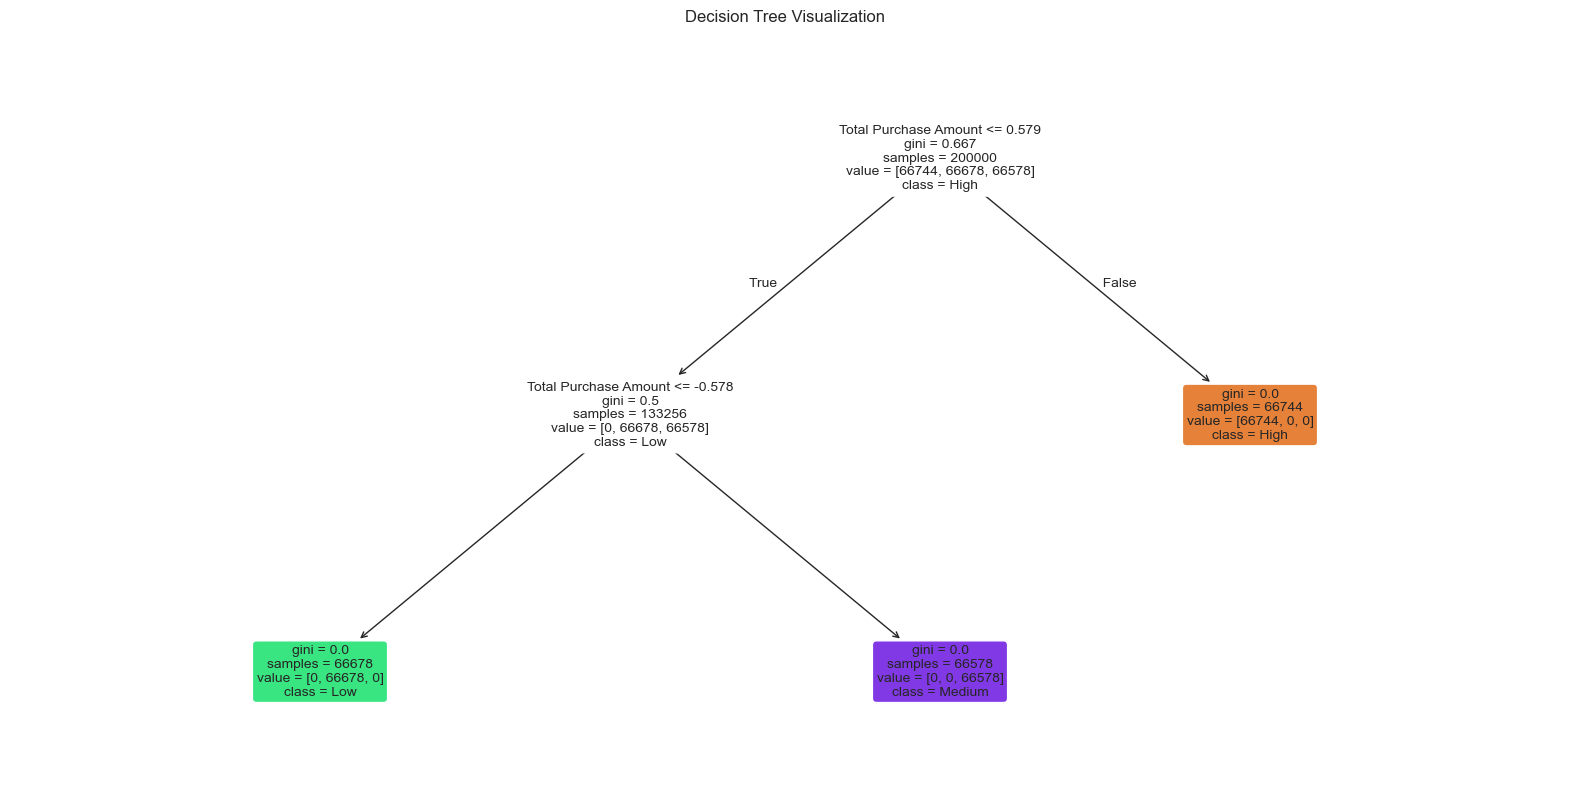

In [203]:
plt.figure(figsize=(20, 10))
plot_tree(dt_clf, 
          feature_names=x_train.columns,class_names=dt_clf.classes_.astype(str), 
          filled=True, 
          rounded=True, 
          fontsize=10)

plt.title("Decision Tree Visualization")
plt.show()

In [204]:
##Random Forest classifier

In [214]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score


In [207]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [208]:
normalizer = Normalizer()
X_train_norm = normalizer.fit_transform(x_train)
X_test_norm = normalizer.transform(x_test)


In [217]:
scores = cross_val_score(pipeline, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", scores)
print(" Mean Accuracy:", np.mean(scores))
print("Standard Deviation:", np.std(scores))

Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
 Mean Accuracy: 1.0
Standard Deviation: 0.0


In [220]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

In [233]:
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)
rf_model=accuracy_score(y_test, y_pred)
print(" Accuracy:",rf_model)
print("\n Classification Report:\n", classification_report(y_test, y_pred))

 Accuracy: 1.0

 Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00     16557
         Low       1.00      1.00      1.00     16676
      Medium       1.00      1.00      1.00     16767

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000



In [218]:
#SVC

In [222]:
from sklearn.svm import SVC

In [224]:
#Standardize features manually
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [225]:
#Train the SVC model
svc_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svc_model.fit(X_train_scaled, y_train)


SVC(random_state=42)

✅ Accuracy: 0.99478

📋 Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00     16557
         Low       0.99      1.00      1.00     16676
      Medium       0.99      0.99      0.99     16767

    accuracy                           0.99     50000
   macro avg       0.99      0.99      0.99     50000
weighted avg       0.99      0.99      0.99     50000



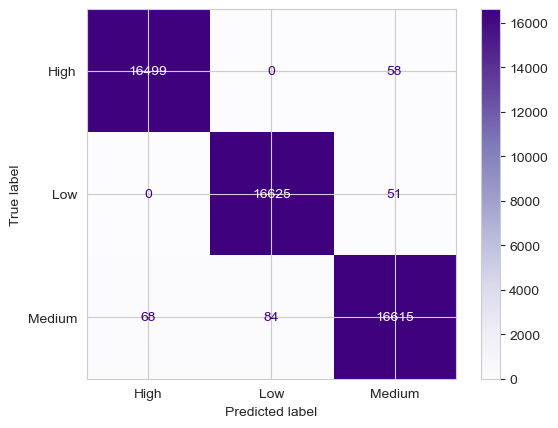

In [234]:
# 4. Predict
y_pred = svc_model.predict(X_test_scaled)
svc_model= accuracy_score(y_test, y_pred)

# 5. Evaluate
print("Accuracy:",svc_model)
print("\n Classification Report:\n", classification_report(y_test, y_pred))

# 6. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap="Purples")

✅ Accuracy: 0.99478

📋 Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00     16557
         Low       0.99      1.00      1.00     16676
      Medium       0.99      0.99      0.99     16767

    accuracy                           0.99     50000
   macro avg       0.99      0.99      0.99     50000
weighted avg       0.99      0.99      0.99     50000



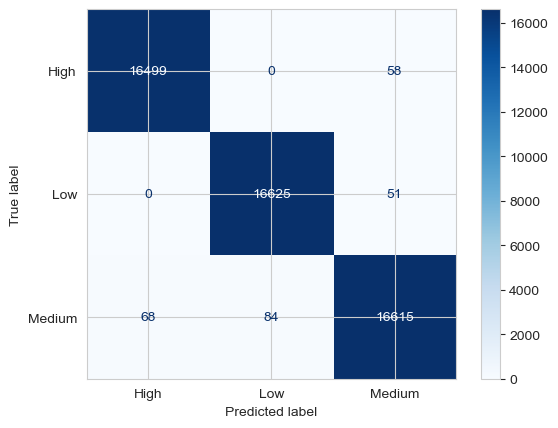

In [227]:
svc_pipeline = Pipeline([
    ('scaler', StandardScaler()),          
    ('svc', SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42))  
])

# 3. Train the model
svc_pipeline.fit(x_train, y_train)

# 4. Predict
y_pred = svc_pipeline.predict(x_test)

# 5. Evaluate
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

# 6. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap="Blues")

In [243]:
accuracy_data = {
    "Model": ["Logistic Regression","KNN Classifier", "Decision Tree", "Random Forest","SVC" ],
       "Accuracy Score": [ logreg_model,knn_model,dt_model, rf_model,svc_model  ]
}

# Create DataFrame
accuracy_df = pd.DataFrame(accuracy_data)

# Sort if desired (highest accuracy first)
accuracy_df = accuracy_df.sort_values(by="Accuracy Score", ascending=False).reset_index(drop=True)

# Display the DataFrame
print(accuracy_df)

                 Model  Accuracy Score
0        Decision Tree         1.00000
1        Random Forest         1.00000
2  Logistic Regression         0.99478
3                  SVC         0.99478
4       KNN Classifier         0.92330


<Figure size 1000x600 with 0 Axes>

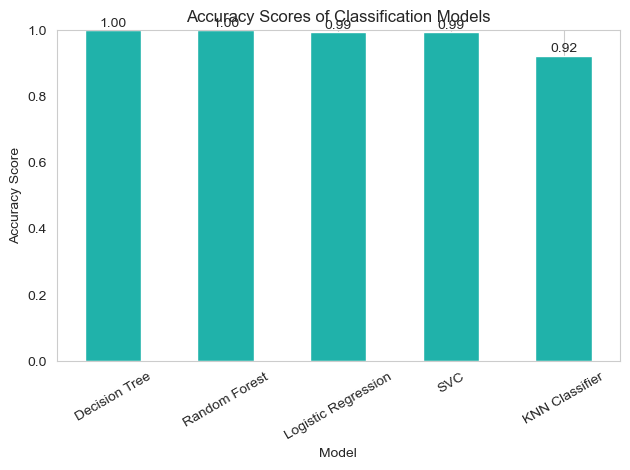

In [264]:
plt.figure(figsize=(10, 6))
# Change to vertical bar chart
accuracy_df.plot(kind='bar', x='Model', y='Accuracy Score', legend=False, color='lightseagreen')

plt.title("Accuracy Scores of Classification Models")
plt.ylabel("Accuracy Score")
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.grid(axis='y')

# Add data labels on top of bars
for index, value in enumerate(accuracy_df["Accuracy Score"]):
    plt.text(index, value + 0.01, f"{value:.2f}", ha='center')

plt.tight_layout()
plt.show()

In [ ]:
##Conclusion
 Random Forest is often the best choice for both regression and classification tasks.